# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [52]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix

## Regression Model Evaluation

In [53]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [55]:
model = LinearRegression()

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [56]:
print('Train set:',r2_score(y_train,y_train_pred))
print('Test set:',r2_score(y_test, y_test_pred))

Train set: 0.7406601123697196
Test set: 0.7280380115360089


## 4. Calculate and print mean squared error for both the training and the testing set.

In [57]:
print('Train set:',mean_squared_error(y_train,y_train_pred))
print('Test set:',mean_squared_error(y_test, y_test_pred))

Train set: 21.93101904513835
Test set: 22.204439801684895


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [58]:
print('Train set:',mean_absolute_error(y_train,y_train_pred))
print('Test set:',mean_absolute_error(y_test, y_test_pred))

Train set: 3.299817832748743
Test set: 3.347424337097777


## Classification Model Evaluation

In [59]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [61]:
log_model = LogisticRegression()

log_model.fit(X_train, y_train)

y_train_pred = log_model.predict(X_train)
y_test_pred = log_model.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [62]:
print('Train set:',accuracy_score(y_train,y_train_pred))
print('Test set:',accuracy_score(y_test, y_test_pred))

Train set: 0.975
Test set: 0.9


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [63]:
print('Train set:',balanced_accuracy_score(y_train,y_train_pred))
print('Test set:',balanced_accuracy_score(y_test, y_test_pred))

Train set: 0.9722620755619321
Test set: 0.9375


## 10. Calculate and print the precision score for both the training and the testing set.

In [64]:
print('Train set:',precision_score(y_train,y_train_pred, average='weighted'))
print('Test set:',precision_score(y_test, y_test_pred, average='weighted'))

Train set: 0.9751443001443001
Test set: 0.925


## 11. Calculate and print the recall score for both the training and the testing set.

In [65]:
print('Train set:',recall_score(y_train,y_train_pred, average='weighted'))
print('Test set:',recall_score(y_test, y_test_pred, average='weighted'))

Train set: 0.975
Test set: 0.9


## 12. Calculate and print the F1 score for both the training and the testing set.

In [66]:
print('Train set:',f1_score(y_train,y_train_pred, average='weighted'))
print('Test set:',f1_score(y_test, y_test_pred, average='weighted'))

Train set: 0.9749640352454596
Test set: 0.9019704433497537


## 13. Generate confusion matrices for both the training and the testing set.

[[45  0  0]
 [ 0 40  1]
 [ 0  2 32]]


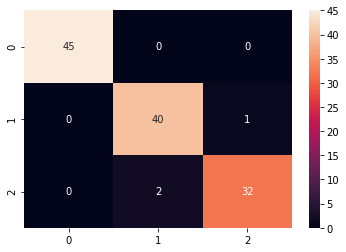

In [67]:
conf_m=confusion_matrix(y_train, y_train_pred)

print (conf_m)
sns.heatmap(conf_m, annot=True)
plt.show();

[[ 5  0  0]
 [ 0  9  0]
 [ 0  3 13]]


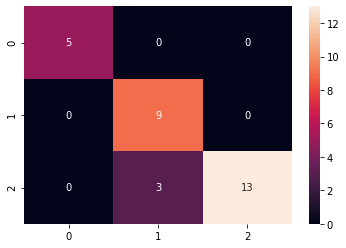

In [68]:
conf_m=confusion_matrix(y_test, y_test_pred)

print (conf_m)
sns.heatmap(conf_m, annot=True)
plt.show();

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.